In [1]:
pip install pandas numpy matplotlib seaborn plotly statsmodels scikit-learn prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip setuptools wheel

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Importing Forecasting Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Time Series Specific
from statsmodels.tsa.stattools import adfuller

c:\Users\SANDILYA SUNDRAM\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf

# Stock ticker and date range
ticker = 'Reliance.NS'  
start_date = '2024-01-01'
end_date = '2025-06-18'

# Download the stock data
df = yf.download(ticker, start=start_date, end=end_date)

print(df.head())

# Saving to CSV
df.to_csv("reliance_stock_data.csv")


C:\Users\SANDILYA SUNDRAM\AppData\Local\Temp\ipykernel_24744\2732017921.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2024-01-01  1290.744263  1299.016237  1282.223134  1285.910692     4030540
2024-01-02  1301.432983  1303.077427  1282.148458  1288.128164     7448800
2024-01-03  1287.281006  1312.545235  1284.241274  1300.585825     9037536
2024-01-04  1293.933350  1300.511122  1285.188128  1289.623028     9612778
2024-01-05  1299.439697  1305.494222  1294.606127  1297.047791     8086406


In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2024-01-01,1290.744263,1299.016237,1282.223134,1285.910692,4030540
2024-01-02,1301.432983,1303.077427,1282.148458,1288.128164,7448800
2024-01-03,1287.281006,1312.545235,1284.241274,1300.585825,9037536
2024-01-04,1293.933350,1300.511122,1285.188128,1289.623028,9612778
2024-01-05,1299.439697,1305.494222,1294.606127,1297.047791,8086406


Some preprocessing has been done in excel

In [24]:
df = pd.read_csv('reliance_stock_data.csv')
df.head()

,Date,Close,High,Low,Open,Volume
0,01-01-2024,1290.744263,1299.016237,1282.223134,1285.910692,4030540
1,02-01-2024,1301.432983,1303.077427,1282.148458,1288.128164,7448800
2,03-01-2024,1287.281006,1312.545235,1284.241274,1300.585825,9037536
3,04-01-2024,1293.933350,1300.511122,1285.188128,1289.623028,9612778
4,05-01-2024,1299.439697,1305.494222,1294.606127,1297.047791,8086406


In [25]:
# Converting date to date time
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-01,1290.744263,1299.016237,1282.223134,1285.910692,4030540.0
2024-01-02,1301.432983,1303.077427,1282.148458,1288.128164,7448800.0
2024-01-03,1287.281006,1312.545235,1284.241274,1300.585825,9037536.0
2024-01-04,1293.933350,1300.511122,1285.188128,1289.623028,9612778.0
2024-01-05,1299.439697,1305.494222,1294.606127,1297.047791,8086406.0


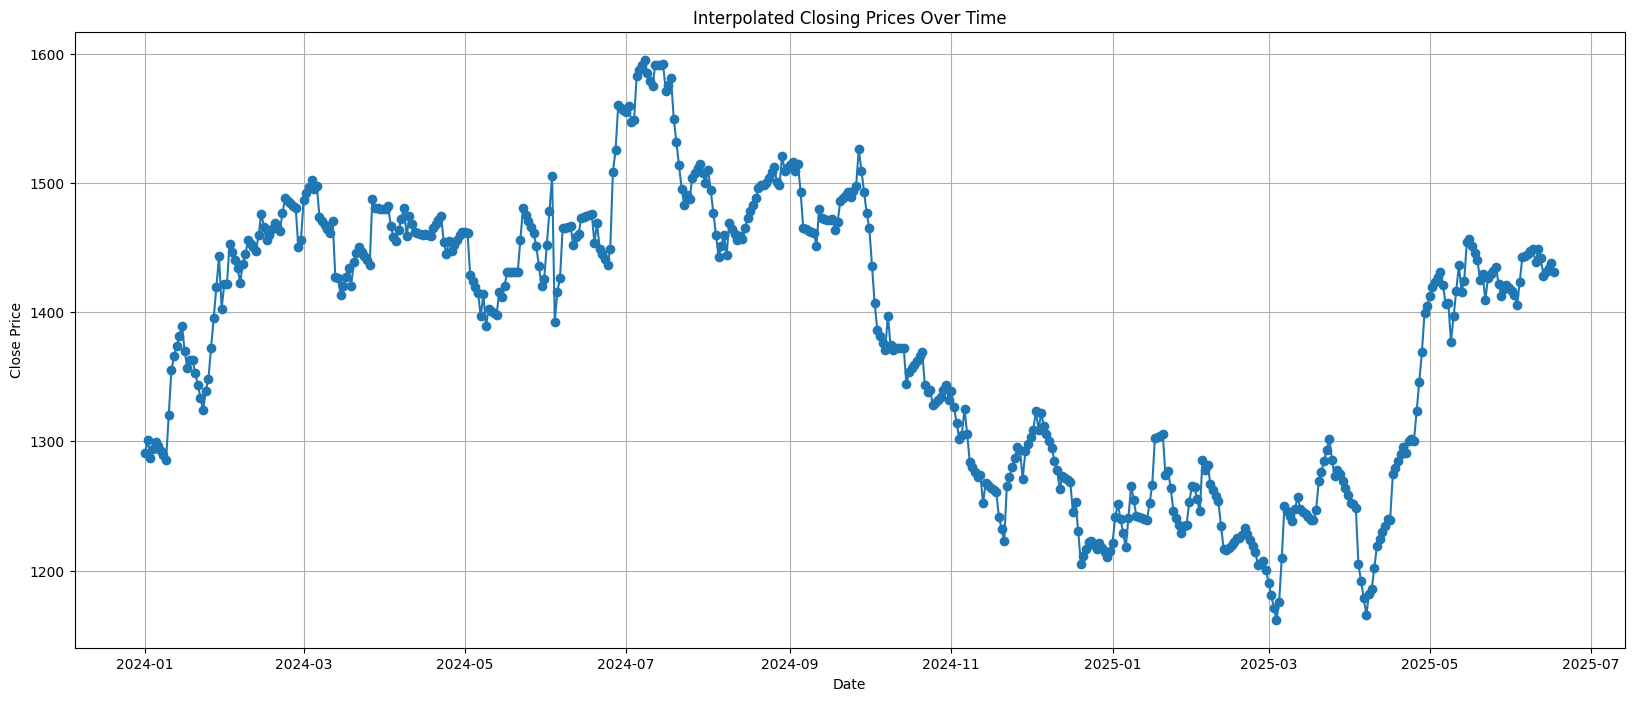

In [26]:
# Resampling to daily frequency and interpolate missing values
df_full = df.asfreq('D')  # Adding all calendar days
df_full['Close'] = df_full['Close'].interpolate(method='linear')  # Fill gaps

plt.figure(figsize=(20, 8))
plt.plot(df_full.index, df_full['Close'], marker='o')
plt.title("Interpolated Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.show()


In [28]:
# Dropping missing values from the 'Close' series
close_clean = df['Close'].dropna()

# Apply ADF test
result = adfuller(close_clean)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.8832148847908667
p-value: 0.3399980877107328


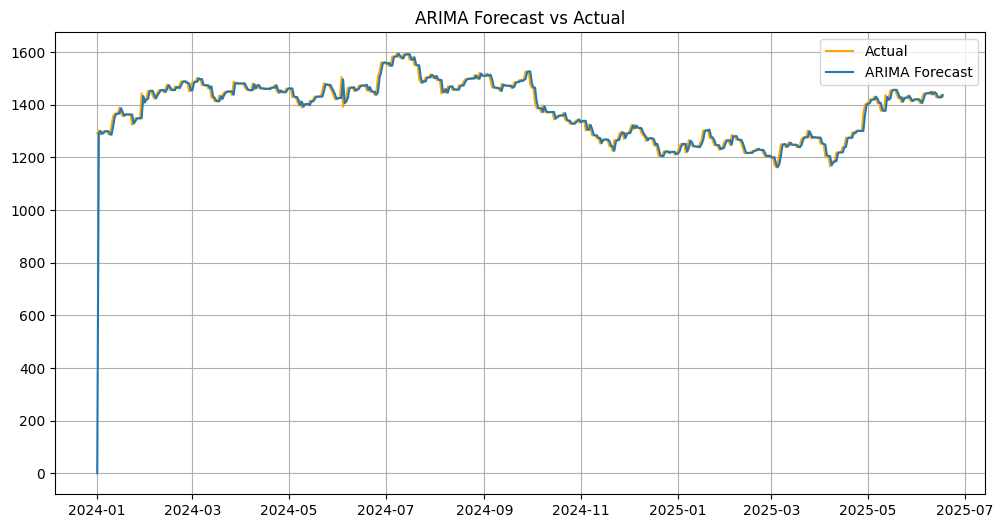

In [ ]:
# Clean 'Close' column
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)

# Resample daily with forward fill
df = df.resample('D').ffill()

# Fit ARIMA
model_arima = ARIMA(df['Close'], order=(1,1,1))
result_arima = model_arima.fit()

# Forecast
forecast_arima = result_arima.predict(start=df.index[0], end=df.index[-1], typ='levels')

# Plot
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual', color='orange')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.grid()
plt.show()


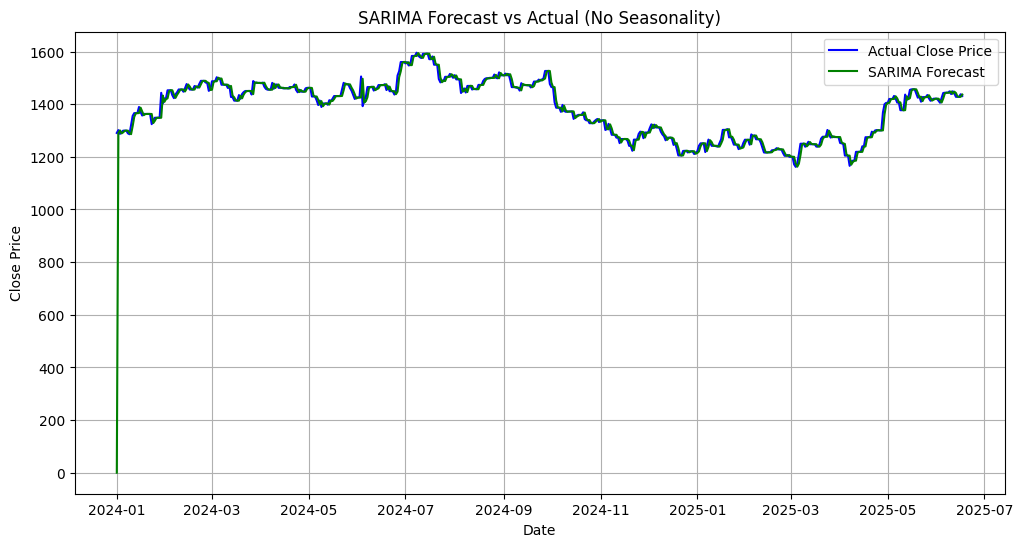

In [30]:
# Set frequency to daily to avoid frequency warnings
df = df.asfreq('D')

# SARIMA model (without seasonality)
model_sarima = SARIMAX(df['Close'],
                       order=(1,1,1),
                       seasonal_order=(0,0,0,0))

# Fit the SARIMA model
result_sarima = model_sarima.fit(disp=False)

# Forecast for the entire data range
forecast_sarima = result_sarima.predict(start=0, end=len(df)-1, typ='levels')

# Plot the actual vs forecasted data
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual Close Price', color='blue')
plt.plot(forecast_sarima, label='SARIMA Forecast', color='green')
plt.title("SARIMA Forecast vs Actual (No Seasonality)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

18:31:23 - cmdstanpy - INFO - Chain [1] start processing
18:31:24 - cmdstanpy - INFO - Chain [1] done processing


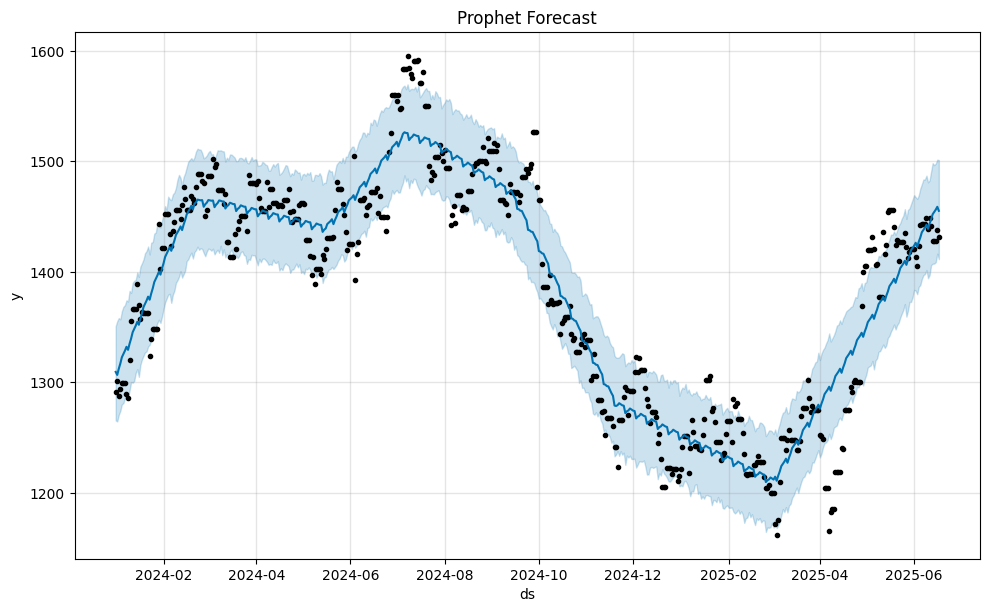

In [31]:
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=0)
forecast_prophet = model_prophet.predict(future)

fig = model_prophet.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


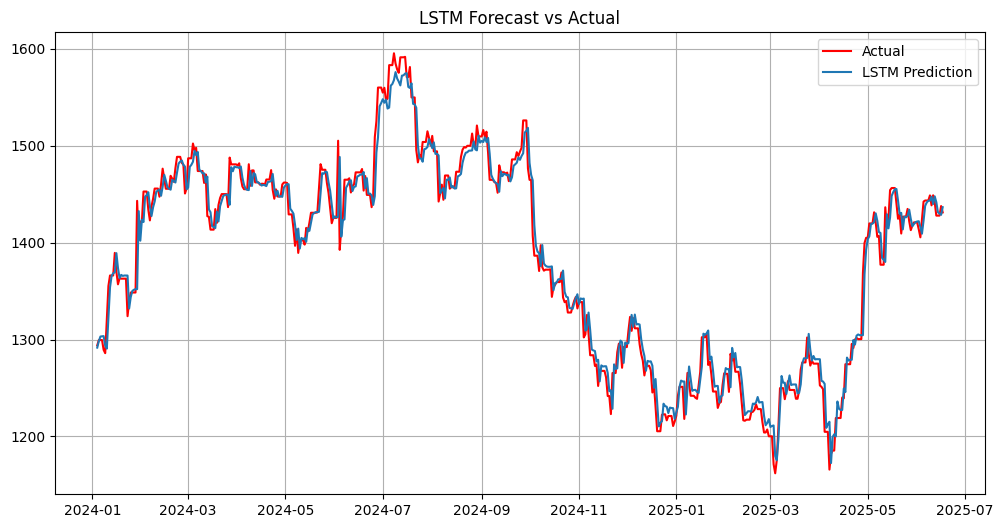

In [32]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
import matplotlib.pyplot as plt

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']])

# Prepare LSTM sequences
X, y = [], []
for i in range(3, len(scaled_data)):
    X.append(scaled_data[i-3:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Clean LSTM Model (Warning Free)
model_lstm = Sequential()
model_lstm.add(Input(shape=(X.shape[1], 1)))   # 
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X, y, epochs=50, batch_size=1, verbose=0)

# Predict
predictions = model_lstm.predict(X)
predictions = scaler.inverse_transform(predictions)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index[3:], df['Close'][3:], label='Actual',color='red')
plt.plot(df.index[3:], predictions, label='LSTM Prediction')
plt.title("LSTM Forecast vs Actual")
plt.legend()
plt.grid()
plt.show()

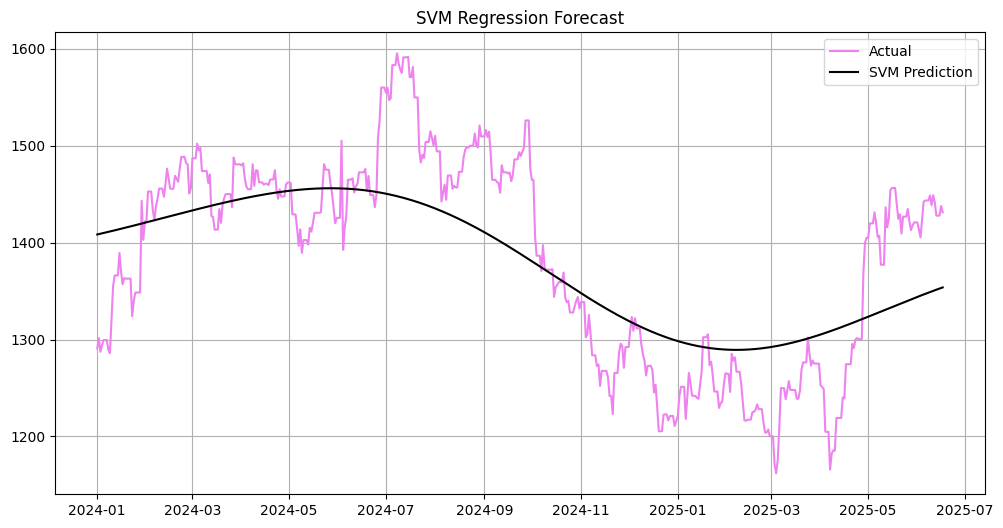

In [33]:
X_svm = np.array(range(len(df))).reshape(-1,1)
y_svm = df['Close'].values

model_svm = SVR(kernel='rbf')
model_svm.fit(X_svm, y_svm)
pred_svm = model_svm.predict(X_svm)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual',color='violet')
plt.plot(df.index, pred_svm, label='SVM Prediction',color='black')
plt.title("SVM Regression Forecast")
plt.legend()
plt.grid()
plt.show()

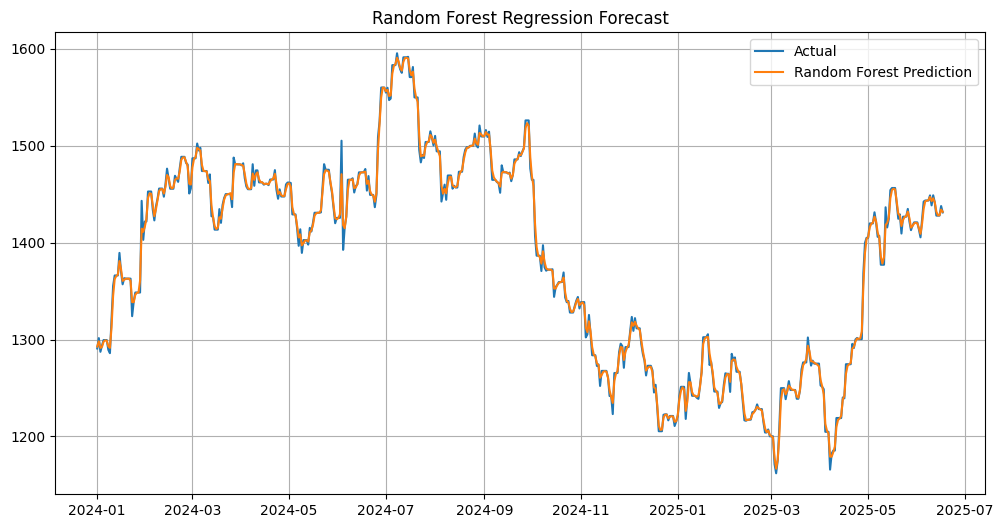

In [34]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_svm, y_svm)
pred_rf = model_rf.predict(X_svm)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(df.index, pred_rf, label='Random Forest Prediction')
plt.title("Random Forest Regression Forecast")
plt.legend()
plt.grid()
plt.show()